In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   

In [2]:
df = pd.read_csv('play.csv')

df.head(10)

,Height,Weight,Class
0,168,68,Cricket
1,170,69,Cricket
2,155,65,Football
3,160,65,Football
4,172,68,Cricket
5,161,64,Football
6,165,75,Wristler
7,166,76,Wristler
8,165,78,Wristler
9,155,67,Football


In [3]:
df.describe()

,Height,Weight
count,10.000000,10.000000
mean,163.700000,69.500000
std,5.850926,5.016639
min,155.000000,64.000000
25%,160.250000,65.500000
50%,165.000000,68.000000
75%,167.500000,73.500000
max,172.000000,78.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  10 non-null     int64 
 1   Weight  10 non-null     int64 
 2   Class   10 non-null     object
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
print(df.columns)

Index(['Height', 'Weight', 'Class'], dtype='object')


<Axes: xlabel='Weight', ylabel='Height'>

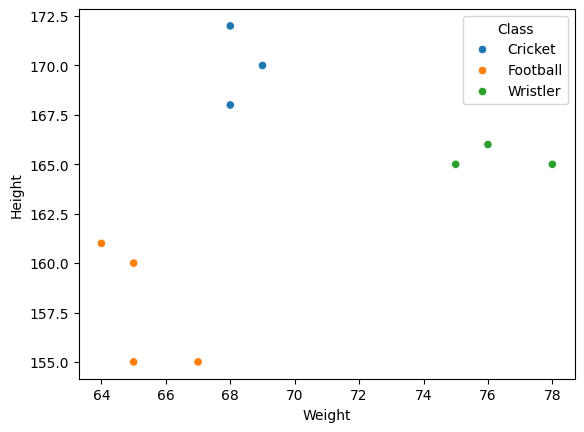

In [6]:
sns.scatterplot(data=df, x = 'Weight', y = 'Height', hue='Class')

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

x = df.drop("Class", axis = 1)
y = df["Class"]

In [8]:
x

,Height,Weight
0,168,68
1,170,69
2,155,65
3,160,65
4,172,68
5,161,64
6,165,75
7,166,76
8,165,78
9,155,67


In [9]:
y

0     Cricket
1     Cricket
2    Football
3    Football
4     Cricket
5    Football
6    Wristler
7    Wristler
8    Wristler
9    Football
Name: Class, dtype: object

In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [11]:
y_encoded

array([0, 0, 1, 1, 0, 1, 2, 2, 2, 1])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x,y_encoded, test_size= 0.2, random_state=42)

In [13]:
X_train

,Height,Weight
5,161,64
0,168,68
7,166,76
2,155,65
9,155,67
4,172,68
3,160,65
6,165,75


In [14]:
X_train.shape

(8, 2)

In [15]:
X_test

,Height,Weight
8,165,78
1,170,69


In [16]:
X_test.shape

(2, 2)

In [17]:
#feature Scalling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_train_scaled

array([[-0.3072659 , -1.05337032],
       [ 0.92179769, -0.11704115],
       [ 0.57063667,  1.75561721],
       [-1.36074897, -0.81928803],
       [-1.36074897, -0.35112344],
       [ 1.62411974, -0.11704115],
       [-0.48284641, -0.81928803],
       [ 0.39505615,  1.52153491]])

In [19]:
X_test_scaled = scaler.transform(X_test)

In [20]:
X_test_scaled

array([[0.39505615, 2.2237818 ],
       [1.27295872, 0.11704115]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [33]:
p = model.predict(X_test_scaled)
p

array([2, 0])

In [25]:
y_test

array([2, 0])

In [31]:
cm = confusion_matrix(p,y_test)
cm

array([[1, 0],
       [0, 1]])